# 📊 Analyse Comparative des Algorithmes d'Apprentissage par Renforcement

**Objectif :** Comparer 4 algorithmes de RL sur un environnement de gestion de trafic urbain

###  Algorithmes étudiés :
1. **SARSA** (On-Policy)
2. **Q-Learning** (Off-Policy) 
3. **Expected SARSA** (TD Learning)
4. **DQN** (Approximation de fonction)

###  Critères de comparaison :
-  Temps d'exécution
-  Vitesse de convergence
-  Performance finale
-  Stabilité de l'apprentissage

In [1]:
# Imports et configuration
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from math import pi

from on_policy import train_sarsa
from off_policy import train_q_learning
from td_learning import train_expected_sarsa
from approximation_fonction import train_dqn

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(" Configuration terminée !")

 Configuration terminée !


##  Exécution des Algorithmes

In [2]:
# Stockage des résultats
resultats = {}
couleurs = ['#3498db', '#e74c3c', '#9b59b6', '#f39c12']

print("===  DÉBUT DE L'ANALYSE COMPARATIVE ===")
print()

===  DÉBUT DE L'ANALYSE COMPARATIVE ===



In [3]:
# 1. SARSA (On-Policy)
print("1️⃣ Entraînement SARSA (On-Policy)...")
start = time.time()
hist_sarsa, _ = train_sarsa()
temps_sarsa = time.time() - start

resultats['SARSA'] = {
    'temps': temps_sarsa,
    'historique': hist_sarsa,
    'recompense_finale': np.mean(hist_sarsa[-50:]),
    'stabilite': np.std(hist_sarsa[-50:]),
    'couleur': couleurs[0]
}

print(f"✅ SARSA terminé en {temps_sarsa:.2f}s")
print(f"   Performance finale: {resultats['SARSA']['recompense_finale']:.2f}")
print()

1️⃣ Entraînement SARSA (On-Policy)...
Début de l'entraînement SARSA (On-Policy)...
--- Entraînement terminé ---
Temps d'exécution : 0.64 secondes
Récompense moyenne finale : -101.90
✅ SARSA terminé en 0.64s
   Performance finale: -101.90



In [4]:
# 2. Q-Learning (Off-Policy)
print("2️⃣ Entraînement Q-Learning (Off-Policy)...")
start = time.time()
hist_q, _ = train_q_learning()
temps_q = time.time() - start

resultats['Q-Learning'] = {
    'temps': temps_q,
    'historique': hist_q,
    'recompense_finale': np.mean(hist_q[-50:]),
    'stabilite': np.std(hist_q[-50:]),
    'couleur': couleurs[1]
}

print(f"✅ Q-Learning terminé en {temps_q:.2f}s")
print(f"   Performance finale: {resultats['Q-Learning']['recompense_finale']:.2f}")
print()

2️⃣ Entraînement Q-Learning (Off-Policy)...
Début de l'entraînement Q-Learning (Off-Policy)...
--- Entraînement terminé ---
Temps d'exécution : 0.89 secondes
Récompense moyenne finale : -95.96
✅ Q-Learning terminé en 0.89s
   Performance finale: -95.96



In [5]:
# 3. Expected SARSA (TD)
print("3️⃣ Entraînement Expected SARSA (TD Learning)...")
start = time.time()
hist_td, _ = train_expected_sarsa()
temps_td = time.time() - start

resultats['Expected SARSA'] = {
    'temps': temps_td,
    'historique': hist_td,
    'recompense_finale': np.mean(hist_td[-50:]),
    'stabilite': np.std(hist_td[-50:]),
    'couleur': couleurs[2]
}

print(f"✅ Expected SARSA terminé en {temps_td:.2f}s")
print(f"   Performance finale: {resultats['Expected SARSA']['recompense_finale']:.2f}")
print()

3️⃣ Entraînement Expected SARSA (TD Learning)...
Début de l'entraînement Expected SARSA (TD Learning)...
--- TD Learning terminé ---
Temps d'exécution : 1.70 secondes
✅ Expected SARSA terminé en 1.70s
   Performance finale: -97.26



In [6]:
# 4. DQN (Approximation)
print("4️⃣ Entraînement DQN (Approximation de fonction)...")
start = time.time()
hist_dqn = train_dqn()
temps_dqn = time.time() - start

resultats['DQN'] = {
    'temps': temps_dqn,
    'historique': hist_dqn,
    'recompense_finale': np.mean(hist_dqn[-50:]),
    'stabilite': np.std(hist_dqn[-50:]),
    'couleur': couleurs[3]
}

print(f"✅ DQN terminé en {temps_dqn:.2f}s")
print(f"   Performance finale: {resultats['DQN']['recompense_finale']:.2f}")
print()
print(" Tous les algorithmes ont été exécutés !")

4️⃣ Entraînement DQN (Approximation de fonction)...
Début de l'entraînement DQN (Approximation de fonction)...
--- DQN terminé ---
Temps d'exécution : 74.98 secondes
✅ DQN terminé en 77.61s
   Performance finale: -95.96

 Tous les algorithmes ont été exécutés !


##  Résultats Numériques Détaillés

In [7]:
# Tableau récapitulatif
data = []
for algo, res in resultats.items():
    data.append({
        'Algorithme': algo,
        'Temps (s)': f"{res['temps']:.2f}",
        'Performance Finale': f"{res['recompense_finale']:.2f}",
        'Stabilité (σ)': f"{res['stabilite']:.2f}",
        'Épisodes': len(res['historique'])
    })

df = pd.DataFrame(data)
print("📋 TABLEAU RÉCAPITULATIF DES PERFORMANCES")
print("=" * 60)
print(df.to_string(index=False))
print("=" * 60)

📋 TABLEAU RÉCAPITULATIF DES PERFORMANCES
    Algorithme Temps (s) Performance Finale Stabilité (σ)  Épisodes
         SARSA      0.64            -101.90         24.00       500
    Q-Learning      0.89             -95.96         12.16       500
Expected SARSA      1.70             -97.26         10.20       500
           DQN     77.61             -95.96         12.51       200


In [8]:
# Classements détaillés
algos = list(resultats.keys())

print("\n🏆 CLASSEMENTS PAR CRITÈRE")
print("=" * 40)

# Temps d'exécution
temps_sorted = sorted(algos, key=lambda x: resultats[x]['temps'])
print("\n⚡ RAPIDITÉ D'EXÉCUTION:")
for i, algo in enumerate(temps_sorted, 1):
    print(f"   {i}. {algo:<15} {resultats[algo]['temps']:.2f}s")

# Performance finale
perf_sorted = sorted(algos, key=lambda x: resultats[x]['recompense_finale'], reverse=True)
print("\n PERFORMANCE FINALE:")
for i, algo in enumerate(perf_sorted, 1):
    print(f"   {i}. {algo:<15} {resultats[algo]['recompense_finale']:.2f}")

# Stabilité
stab_sorted = sorted(algos, key=lambda x: resultats[x]['stabilite'])
print("\n STABILITÉ:")
for i, algo in enumerate(stab_sorted, 1):
    print(f"   {i}. {algo:<15} σ = {resultats[algo]['stabilite']:.2f}")

print("\n" + "=" * 40)


🏆 CLASSEMENTS PAR CRITÈRE

⚡ RAPIDITÉ D'EXÉCUTION:
   1. SARSA           0.64s
   2. Q-Learning      0.89s
   3. Expected SARSA  1.70s
   4. DQN             77.61s

 PERFORMANCE FINALE:
   1. Q-Learning      -95.96
   2. DQN             -95.96
   3. Expected SARSA  -97.26
   4. SARSA           -101.90

 STABILITÉ:
   1. Expected SARSA  σ = 10.20
   2. Q-Learning      σ = 12.16
   3. DQN             σ = 12.51
   4. SARSA           σ = 24.00



##  Visualisations Comparatives

C:\Users\hp\AppData\Local\Temp\ipykernel_7732\451247519.py:23: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


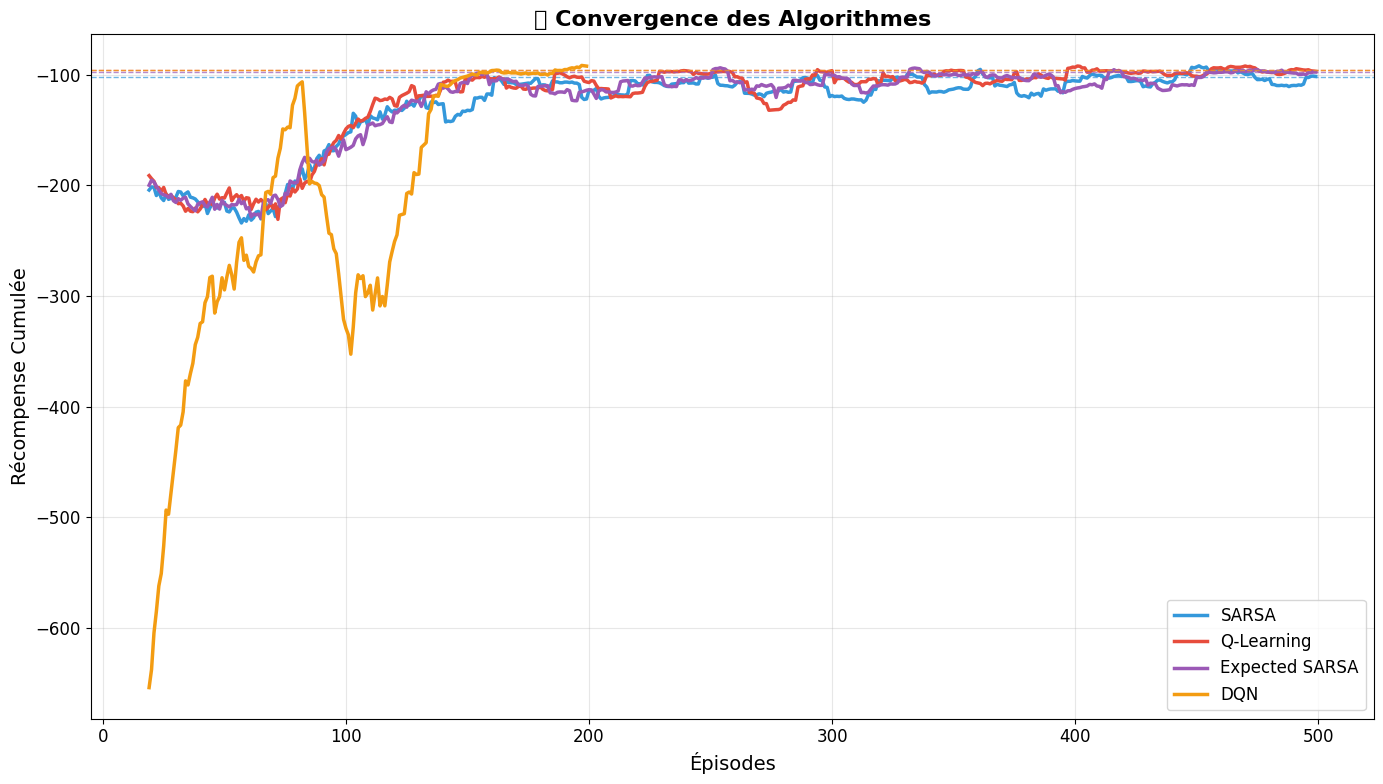

In [9]:
# Graphique 1: Convergence des algorithmes
plt.figure(figsize=(14, 8))

for algo, res in resultats.items():
    # Lissage pour une meilleure visualisation
    window = 20
    if len(res['historique']) >= window:
        smoothed = np.convolve(res['historique'], np.ones(window)/window, mode='valid')
        x = range(window-1, len(res['historique']))
        plt.plot(x, smoothed, label=algo, linewidth=2.5, color=res['couleur'])
    else:
        plt.plot(res['historique'], label=algo, linewidth=2.5, color=res['couleur'])
    
    # Ligne de performance finale
    plt.axhline(y=res['recompense_finale'], color=res['couleur'], 
                linestyle='--', alpha=0.7, linewidth=1)

plt.title('🚀 Convergence des Algorithmes', fontsize=16, fontweight='bold')
plt.xlabel('Épisodes', fontsize=14)
plt.ylabel('Récompense Cumulée', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

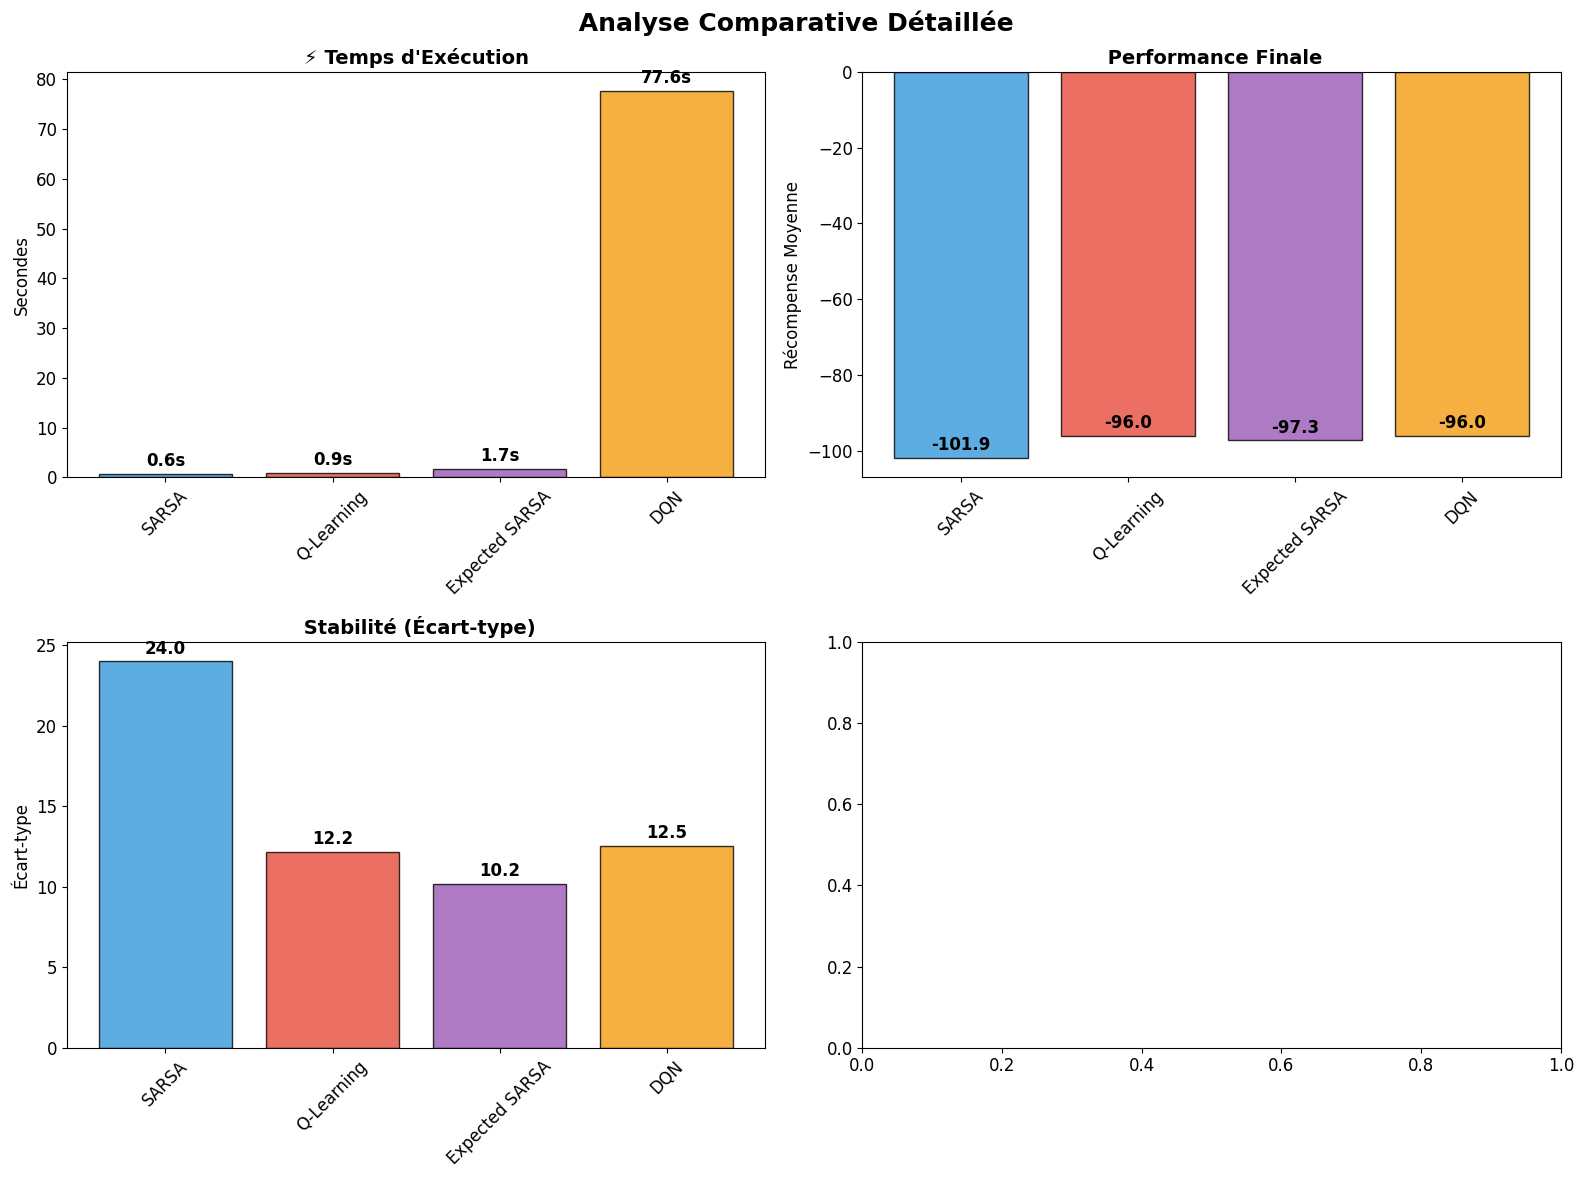

In [10]:
# Graphique 2: Comparaison des métriques
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Analyse Comparative Détaillée', fontsize=18, fontweight='bold')

algos = list(resultats.keys())
couleurs_algo = [resultats[algo]['couleur'] for algo in algos]

# Temps d'exécution
temps = [resultats[algo]['temps'] for algo in algos]
bars1 = axes[0,0].bar(algos, temps, color=couleurs_algo, alpha=0.8, edgecolor='black')
axes[0,0].set_title('⚡ Temps d\'Exécution', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Secondes')
axes[0,0].tick_params(axis='x', rotation=45)
for bar, val in zip(bars1, temps):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(temps)*0.01, 
                   f'{val:.1f}s', ha='center', va='bottom', fontweight='bold')

# Performance finale
performances = [resultats[algo]['recompense_finale'] for algo in algos]
bars2 = axes[0,1].bar(algos, performances, color=couleurs_algo, alpha=0.8, edgecolor='black')
axes[0,1].set_title(' Performance Finale', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Récompense Moyenne')
axes[0,1].tick_params(axis='x', rotation=45)
for bar, val in zip(bars2, performances):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + abs(max(performances))*0.01, 
                   f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Stabilité
stabilites = [resultats[algo]['stabilite'] for algo in algos]
bars3 = axes[1,0].bar(algos, stabilites, color=couleurs_algo, alpha=0.8, edgecolor='black')
axes[1,0].set_title(' Stabilité (Écart-type)', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Écart-type')
axes[1,0].tick_params(axis='x', rotation=45)
for bar, val in zip(bars3, stabilites):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(stabilites)*0.01, 
                   f'{val:.1f}', ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()

##  Conclusions

In [11]:
# Analyse des résultats
print(" ANALYSE DES RÉSULTATS")
print("=" * 50)

meilleur_temps = min(algos, key=lambda x: resultats[x]['temps'])
meilleure_perf = max(algos, key=lambda x: resultats[x]['recompense_finale'])
plus_stable = min(algos, key=lambda x: resultats[x]['stabilite'])

print(f"\nPLUS RAPIDE: {meilleur_temps}")
print(f"   → {resultats[meilleur_temps]['temps']:.2f} secondes")

print(f"\n MEILLEURE PERFORMANCE: {meilleure_perf}")
print(f"   → {resultats[meilleure_perf]['recompense_finale']:.2f} de récompense")

print(f"\n PLUS STABLE: {plus_stable}")
print(f"   → Écart-type de {resultats[plus_stable]['stabilite']:.2f}")

print("\n" + "=" * 50)

 ANALYSE DES RÉSULTATS

PLUS RAPIDE: SARSA
   → 0.64 secondes

 MEILLEURE PERFORMANCE: Q-Learning
   → -95.96 de récompense

 PLUS STABLE: Expected SARSA
   → Écart-type de 10.20

